In [ ]:
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплатыТребуется выполнить следующее задание:

Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

In [ ]:
corrMatrix = df.corr()
corrMatrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


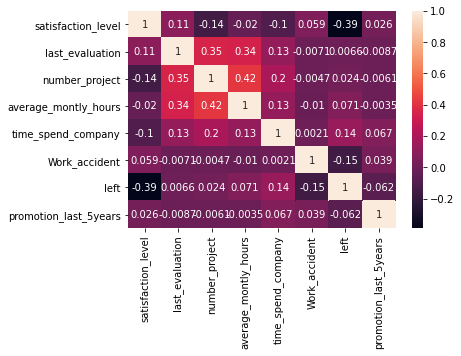

In [ ]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [ ]:
# Функция получения множества имен колонок с нечисловыми значениями, которые предстоит удалить из датасета
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Функция получения N первых значений из отсортированного списка абсолютных значений для коррелирующих пар
def get_top_abs_correlations(df, corr, ascending, n=2):
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=np.number))
    au_corr = corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[0:n]

In [ ]:
au_corr = corrMatrix.abs().unstack()
get_top_abs_correlations(df, au_corr, False)

number_project      average_montly_hours    0.417211
satisfaction_level  left                    0.388375
dtype: float64

In [ ]:
get_top_abs_correlations(df, au_corr, True)

time_spend_company    Work_accident            0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64

Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [ ]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Показать распределение сотрудников по зарплатам

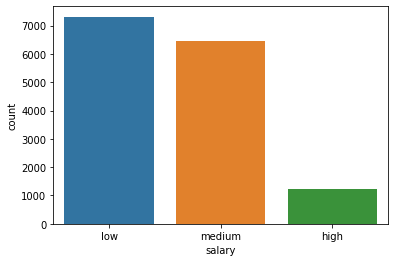

In [ ]:
sns.countplot(x='salary', data=df)
plt.show()

Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

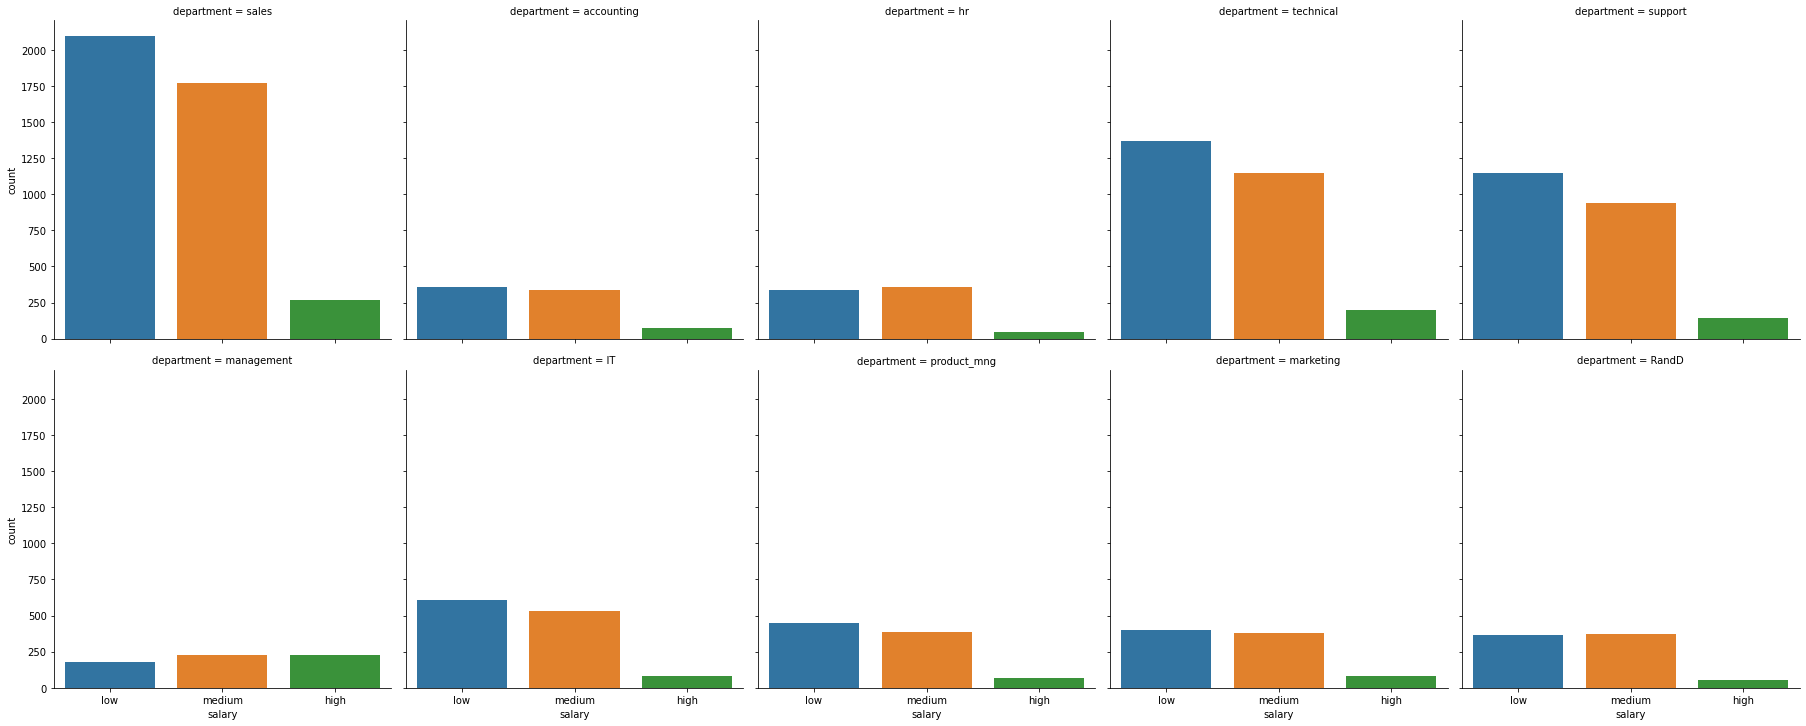

In [ ]:
sns.catplot(x='salary', col='department', data=df, kind='count', col_wrap=5)
plt.show()

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

H0 = Нет разницы в количестве проведенного времени между сотрудниками которые получают высокий и низкий оклады
H1 = Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
def salary_hyp(high, low):
    if high > low:
        print('H1 = True')
    else:
        print('H1 = False')

In [ ]:
salary_hyp(hours['high'], hours['low'])

H1 = False


In [ ]:
hours = df.groupby('salary')['average_montly_hours'].mean()
hours

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [ ]:
get_top_abs_correlations(df, au_corr, True)

time_spend_company    Work_accident            0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64

Проверено. Не подтвердилась

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

Доля сотрудников с повышением за последние 5 лет

In [ ]:
df.loc[df['promotion_last_5years'] == 1]['left'].value_counts().rename('promotion_last_5years').rename_axis('left')

left
0    300
1     19
Name: promotion_last_5years, dtype: int64

Средняя степень удовлетворенности

In [ ]:
left = df.groupby('left')
left['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов

In [ ]:
left['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки

Загрузить jupyter notebook с решение на github и прислать ссылку